# Explore the dataset

In [1]:
import os
import numpy as np
from PIL import Image   # used to open, manipulates and saves images
import matplotlib.pyplot as plt
import random
import cv2
import shutil

In [2]:
DATASET_DIR = "../dataset/"

CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

## Count images per class

Image counts per class:
cardboard: 247
glass: 385
metal: 315
paper: 449
plastic: 363
trash: 106
Total number of images in the dataset: 1865


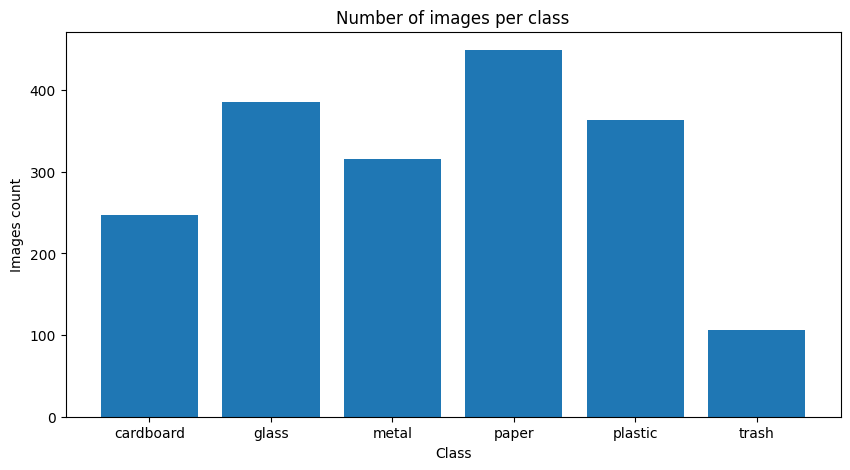

In [3]:
def get_img_count_per_class():
    class_counts = {}

    for cls in CLASSES:
        # get the folder of the class
        folder_path = os.path.join(DATASET_DIR, cls)
        # get the images from the class folder
        images = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[cls] = len(images)

    print("Image counts per class:")
    total_images = 0
    for cls, cls_count in class_counts.items():
        print(f"{cls}: {cls_count}")
        total_images += cls_count

    print(f"Total number of images in the dataset: {total_images}")

    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title("Number of images per class")
    plt.xlabel("Class")
    plt.ylabel("Images count")
    plt.show()

get_img_count_per_class()

## Visual Inspection of Random Images

* Display 3-5 random images from each class
* Check things like lighting, blur, rotation, scale ...
* These insgights may help us determining what agumentations to make

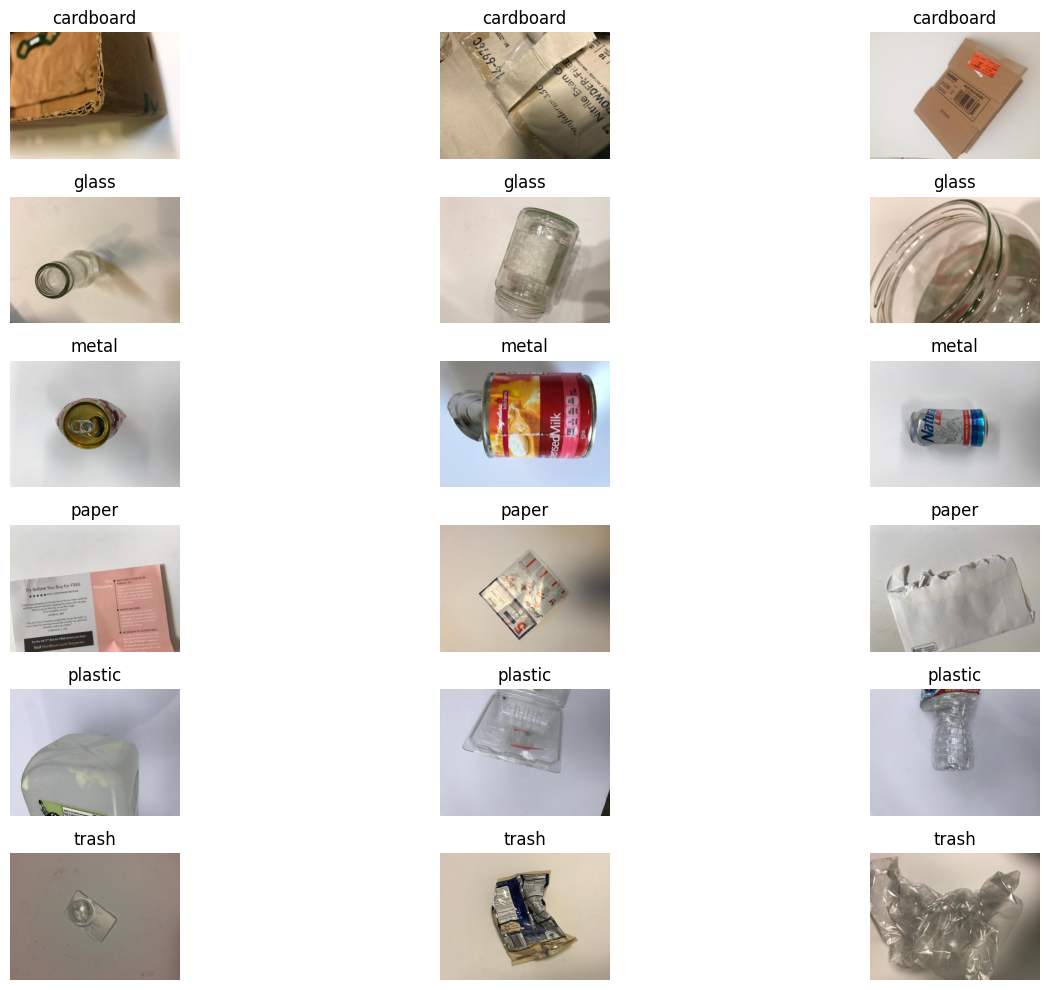

In [4]:
def display_random_images(n = 3):
    plt.figure(figsize=(15, 10))
    img_idx = 1
    for cls in CLASSES:
        # get the folder of the class
        folder_path = os.path.join(DATASET_DIR, cls)
        # get the images in the class folder
        images = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

        # pick random samples from the images
        samples = random.sample(images, n)

        for image_name in samples:
            image_path = os.path.join(folder_path, image_name)
            image = Image.open(image_path)
            plt.subplot(len(CLASSES), n, img_idx)
            plt.imshow(image)
            plt.axis("off")
            plt.title(cls)
            img_idx += 1
        
    plt.tight_layout()
    plt.show() 


display_random_images()


## Image size distribution

* For each image record its width and height
* Images may have inconsistent sizes

Image width: [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 5

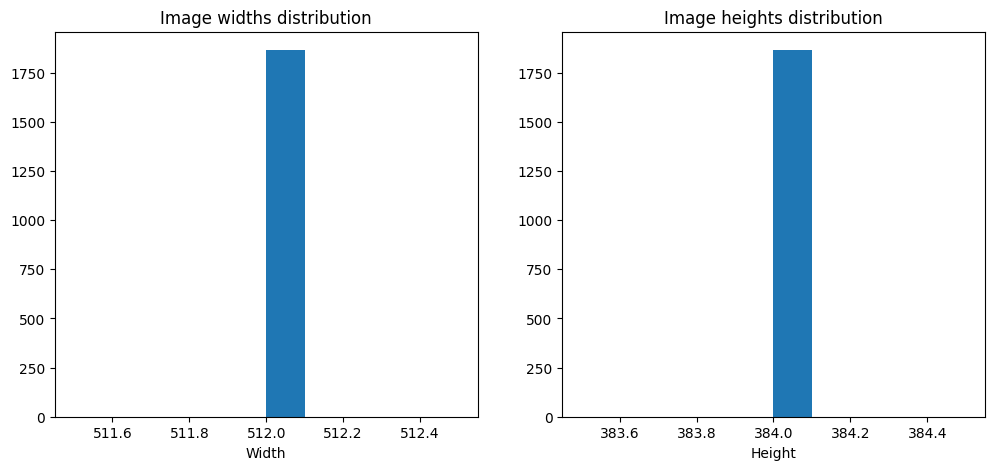

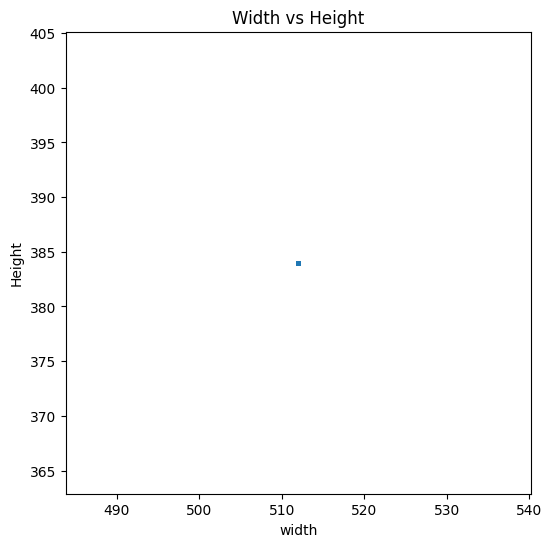

In [5]:
def get_images_size():
    widths = []
    heights = []
    
    for cls in CLASSES:
        # get the class folder
        folder = os.path.join(DATASET_DIR, cls)
        # list all files in the class folder
        for file in os.listdir(folder):
            if file.endswith(('.jpg', '.png', 'jpeg')):
                # get the image path
                path = os.path.join(folder, file)
                try:
                    # open the image and record its width and height
                    img = Image.open(path)
                    widths.append(img.width)
                    heights.append(img.height)
                except:
                    pass
    
    print(f"Image width: {widths}")
    print(f"Image height: {heights}")

    # plot the width histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=10)
    plt.title("Image widths distribution")
    plt.xlabel("Width")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=10)
    plt.title("Image heights distribution")
    plt.xlabel("Height")

    plt.show()

    # width vs height
    plt.figure(figsize=(6, 6))
    plt.scatter(widths, heights, s=5)
    plt.title("Width vs Height")
    plt.xlabel("width")
    plt.ylabel("Height")
    plt.show()

get_images_size()

* image size -> (512 * 384)

## Detect corrupted images

* Try loading all images using OpenCV
* If it throws an error, mark this image as corrupted

In [6]:
CORRUPTED_DIR = "../corrupted_images"
os.makedirs(CORRUPTED_DIR, exist_ok=True)

In [7]:
def get_corrupted_images():
    # list of paths to corrupted images
    corrupted_images = []

    # attempt to load every image using OpenCV
    # if loading fails mark image as corrupted
    for cls in CLASSES:
        # get the class folder
        folder = os.path.join(DATASET_DIR, cls)
        # list all files in the class folder
        for file in os.listdir(folder):
            if file.endswith(('.jpg', '.png', 'jpeg')):
                image_path = os.path.join(folder, file)
                image = cv2.imread(image_path)
                if image is None:
                    corrupted_images.append(image_path)
                    # mov corrupted images to another directory
                    corrupted_path = os.path.join(CORRUPTED_DIR, f"{cls}_{file}")
                    shutil.move(image_path, corrupted_path)

    print(f"Corrupted images found: {len(corrupted_images)}")
    for path in corrupted_images:
        print(path)

get_corrupted_images()

Corrupted images found: 0


In [8]:
get_corrupted_images()

Corrupted images found: 0


Image counts per class:
cardboard: 247
glass: 385
metal: 315
paper: 449
plastic: 363
trash: 106
Total number of images in the dataset: 1865


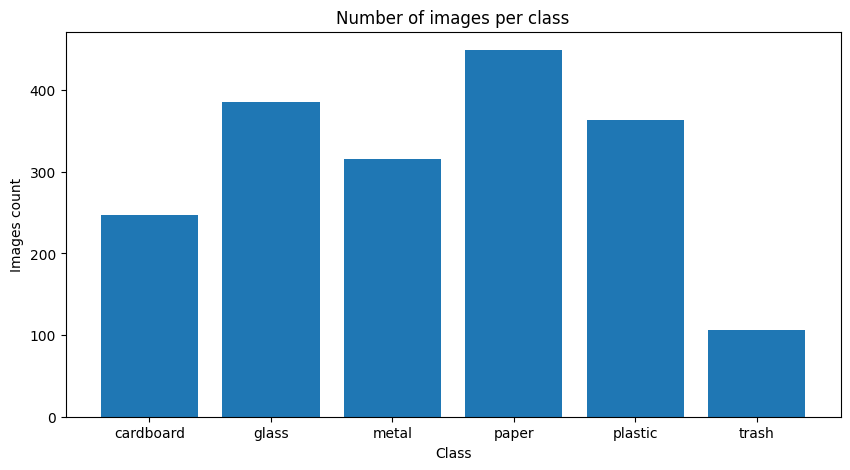

In [9]:
get_img_count_per_class()

Number of needed images -> 1.3*1865 = 2425 image
then each folder should have 485 image